In [1]:
import numpy as np
from scipy.integrate import simps
from scipy.integrate import quad
import pandas as pd 
import del_m_fisher_bias_full as m  # CHECK WHICH D0,D1 IS USED
import numpy as np
#import fisher_ayan_function as f
#import dmdtheta_ayan_function as dm
#import fisher_ayan_function_LSST as f
#import fisher_ayan_function_LSST_CMBPrior as f
import sys
import matplotlib.pyplot as plt
import math
from matplotlib.patches import Ellipse
import matplotlib as mpl
import matplotlib.pyplot as plt
#import Fisher_Ellipse_LSST_CMBPrior as F
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
from copy import copy

In [2]:
ar5x, ar5y = 0.1552386915659174,  -0.5711070255976858 
ar4x, ar4y = 0.20003047641507615, -0.7417301819780668
ar3x, ar3y = 0.36706302456647105, -1.4209772025394587
ar2x, ar2y = -0.08839490222636548, 0.5279939761358703
ar1x, ar1y = -0.8374645718141256, 4.023065776526511
ar0x, ar0y = -0.7582721877981218, 4.945380938851773

In [3]:
#b = pd.read_csv('interpolated_fout.csv' )
#b = pd.read_csv('Catastrophic/f.csv',sep =',' )
b = pd.read_csv('Catastrophic/f2.csv' )
#b = pd.read_csv('interpolated_error.csv',sep =' ' )

In [4]:
Om = 0.3  # Omega Matter
Omatter = (1-Om)
w0 = -1
wa = 0
#w0 = -1.2;wa = -0.9;
#w0 = -0.8;wa = 0.9;
#a = (1+z)**(-1)
# 1
print ('w0, wa used : ', w0, wa)
# Not Required
#---------------------------------

def X(z):
    a = (1+z)**(-1)
    return Om*(a**-3)+((1-Om)*a**(-3)*(a**(-3*(w0+wa))*np.exp(3*wa*(a-1))))


def dxdm(z, wa, w0):
    a = (1+z)**(-1)
    zt = (1+z)
    w = (wa+w0)
    X3 = np.exp(3*wa*(a-1))
    X2 = zt**(3*w)
    X1 = X2*X3
    X4 = 1.-X1
    X = Om*(a**-3)+((1-Om)*a**(-3)*(a**(-3*(w0+wa))*np.exp(3*wa*(a-1))))
    A = (X**(-1.5))*X4*(zt**3)
    #A  = [1-zt**(-3*w)*np.exp(-3*wa*z/zt)]*zt**3
    return A

# 2


def dxdw0(z, wa, w0):
    a = (1+z)**(-1)
    zt = (1+z)
    ztt = z/zt  # z/1+z
    a_a = a**(3*wa)
    a_0 = a**(3*w0)
    e_a = np.exp(3*wa*(-ztt))
    A3 = (a_a**-1)*(-3*np.log(a)/a_0)
    A4 = e_a*A3
    X = Om*(a**-3)+((1-Om)*a**(-3)*(a**(-3*(w0+wa))*np.exp(3*wa*(a-1))))
    A = (X**(-1.5))*Omatter*zt**3*(A4)
    return A


# 3
def dxdwa(z, wa, w0):
    a = (1+z)**(-1)
    a2 = a-1
    zt = (1+z)
    ztt = z/zt
    a_a = a**(3*wa)
    a_0 = a**(3*w0)
    e_a = np.exp(3*wa*(-ztt))
    A3 = e_a*(-3*np.log(a)/a_a)
    A2 = 3*(a-1)*e_a/(a_a)
    A4 = A2+A3
    X = Om*(a**-3)+((1-Om)*a**(-3)*(a**(-3*(w0+wa))*np.exp(3*wa*(a-1))))
    A = (X**(-1.5))*(Omatter)*(zt**3)*(a_0**-1)*(A4)
    return A

# dxdM = 1 

# PRINTING CHECKS
#print 'Redshift  dx/dm      dx/dwo      dx/dwa'
#print '---------------------------------------'
# for i in (np.linspace(0.05,1.65,17)):
#          print("%.4f    %.4f    %.4f     %.4f " %(i,dxdm(i,0,-1),dxdw0(i,0,-1),dxdwa(i,0,-1)) )
# ************************************************************
# ************************************************************


# Integration Part : STARTS FROmatter BELOW

def H_0D_L(z):  # THIS WILL BE THEN INTEGRATED IN LINE NO. 106
    a = (1+z)**(-1)
    sec = (1-Om)*(a**-3)*(a**(-3*(w0+wa))*np.exp(3*(wa*(a-1))))
    fir = (Om*(a**-3))
    return((fir+sec)**(-0.5))


# ADDITIONAL FUNCTION DECLARATION
def fu1(z):
    return dxdm(z, wa, w0)


def fu2(z):
    return dxdw0(z, wa, w0)


def fu3(z):
    return dxdwa(z, wa, w0)

w0, wa used :  -1 0


In [5]:
from scipy.integrate import quad

# **************************
# This program returns the delta_m_k value
# **************************
# (5/ln10)*[delz(1/H*(1/int_0^z'delz/H ) + 1/(1+z))] !!NOT USED HERE!!
# w_a = 0, w_o = -1 , omega_m = 0.3
# H(z) = sqrt(omega_m*(1+z)^3 + (1-omega_m))

# D_L = (1+z) integration(dz/H(z))LIMIT:[0,z]

const = 5/np.log(10)


def H_z(z):
    omega_m = 0.3
    omega_de = 1-omega_m
    hz = omega_m*(1+z)**3+omega_de
    return np.sqrt(hz)


def H_z_inverse(z):
    return 1/(H_z(z))


#def del_z(d0, d1, z):
 #   return (d0+d1*z) # Dont need now

def integration_delz_h(z):
    I = quad(H_z_inverse, 0, z)[0]
    return I


def D_l(z):
    return (1+z)*integration_delz_h(z)


def del_m(i):
    #scale = b.bias[i]/1.0
    bias = b.z_photo[i] - b.z[i]
    #x = const*np.log(D_l(z+b.bias[c])/D_l(z))
    x = const*np.log(D_l(z[i]+bias)/D_l(z[i]))
    return x

def fisher_matrix():
    return Fisher_Matrix_PRIOR


def covariance_matrix():
    return Cov_Matrix_PRIOR

In [6]:
#The Marginalized [2X2] subset of COVARIANCE Matrix.
# Here Marginalized over M, omega_m
# Obtained from : fisher_ayan_function_LSST_CMBPrior.py
#F = [0, -1,C_ij_PRIOR[3] ,C_ij_PRIOR[2] ,Cov_Matrix_PRIOR[3][2] ]
F = [0, -1, 2.8902e-01, 1.6886e-02, -6.8702e-02]
# F = [wa,wo,wawa,wowo,wowa]  wa, w0, sigma_aa, sigma_00, sigma_a0
alpha = 1.52    # arxiv : 0906.4123. 1-s CL
#print ('The Height and Width roughly is %.2f  %.2f' % (
 #   2*alpha*np.sqrt(F[2]), 2*alpha*np.sqrt(F[3])))

def a_square(sigma_x, sigma_y, sigma_xy):
    F = sigma_x + sigma_y
    G = (sigma_x - sigma_y)**2
    H = (G/4) + sigma_xy**2
    A = F/2 + np.sqrt(H)
    return A

def b_square(sigma_x, sigma_y, sigma_xy):
    F = sigma_x + sigma_y
    G = (sigma_x - sigma_y)**2
    H = (G/4) + sigma_xy**2
    B = F/2 - np.sqrt(H)
    return B

def tan_two_theta(sigma_x, sigma_y, sigma_xy):
    print ('theta :', -math.degrees(0.5*math.atan(2*sigma_xy/(sigma_x-sigma_y))))
    return(0.5*math.atan(2*sigma_xy/(sigma_x-sigma_y)))

def area(sigma_x, sigma_y, sigma_xy):
    return np.pi*(np.sqrt(a_square(sigma_x, sigma_y, sigma_xy))*alpha)*(np.sqrt(b_square(sigma_x, sigma_y, sigma_xy))*alpha)

def par(sigma_x, sigma_y, sigma_xy):
    a_star = np.sqrt(np.abs(a_square(sigma_x, sigma_y, sigma_xy)))*2*1.52
    b_star = np.sqrt(np.abs(b_square(sigma_x, sigma_y, sigma_xy)))*2*1.52
    two_theta = tan_two_theta(sigma_x, sigma_y, sigma_xy)
    param = [a_star, b_star, two_theta]
    return param

# ------------------------- ******

theta : 13.394902309736473


NameError: name 'x' is not defined

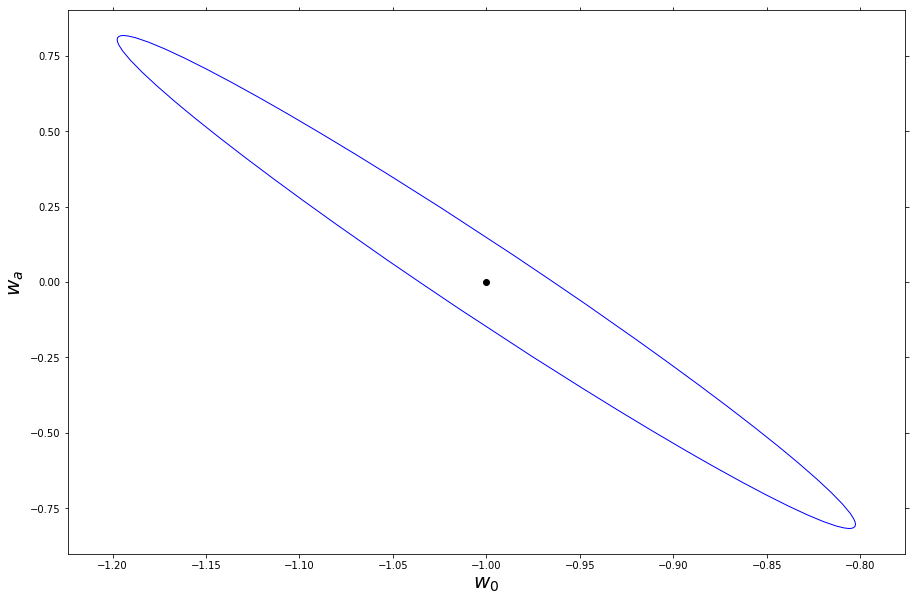

In [7]:
plt.rcParams['figure.figsize'] = [15,10] 
alpha = 1.52
F = [0, -1, 2.8902e-01, 1.6886e-02, -6.8702e-02]
params = par(F[2], F[3], F[4])

ell = mpl.patches.Ellipse(xy=[-1, 0], width=params[1], height=params[0], angle=-
                          math.degrees(params[2]), facecolor='none', edgecolor='b', label='1-sigma')
fig, ax = plt.subplots()
ax.add_patch(ell)
ax.set_aspect('auto')
ax.set_facecolor('none')
ax.autoscale()  # ''tight
ax.scatter(F[1], F[0], c='black', marker='o', label='w0-wa')
ax.set_xlabel(r'$w_0$',fontsize=20)
ax.set_ylabel(r'$w_a$',fontsize=20)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
#ax.set_xlim(-1.35, -0.75)
#ax.set_ylim(-0.9, 0.9)
r = x.iloc[1:,:] # after first line
del_w0_1_all = x['del_w0'].iloc[0]    
del_wa_1_all = x['del_wa'].iloc[0] 

colors = ["red", "grey" , "grey", "grey", "grey","grey",'grey',"grey","","grey","grey","blue"]
del_w0_1 = r['del_w0']  
del_wa_1 = r['del_wa']  
x4 = [];y4=[];

#plt.plot(x4,y4)    
ar1=plt.arrow(-1, 0, ar0x, ar0y, head_width=0.01, head_length=0.05,length_includes_head=True, color='lime',label='1')
ar2=plt.arrow(-1, 0, ar1x, ar1y, head_width=0.01, head_length=0.05,length_includes_head=True, color='orange')
ar3=plt.arrow(-1, 0, ar2x, ar2y, head_width=0.01, head_length=0.05,length_includes_head=True, color='deepskyblue')
ar4=plt.arrow(-1, 0, ar3x, ar3y, head_width=0.01, head_length=0.05,length_includes_head=True, color='cyan')
ar5=plt.arrow(-1, 0, ar4x, ar4y, head_width=0.01, head_length=0.05,length_includes_head=True, color='deeppink')
ar6=plt.arrow(-1, 0, ar5x, ar5y, head_width=0.01, head_length=0.05,length_includes_head=True, color='coral')



plt.legend([ar1,ar2,ar3,ar4,ar5,ar6], ['1','2','3','4','5','6'])
#plt.legend()